<a href="https://colab.research.google.com/github/khushboo28sahu/Deep_Learning/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, shutil

In [20]:
# # %pwd
# # !ls
# %cd codes/
# !ls
#%pwd

/content/drive/My Drive/M. tech. iiitnr/M. Tech. Assign. & Labs/Mtech_Sem2 /Deep_Learning/codes
'193000102_MNIST (1).ipynb'		     Cat-Dog-mini.zip
 193000102_MNIST.ipynb			    'Copy of MNIST.ipynb'
 1.ipynb				     DL_1_MNIST_BASIC_NN.ipynb
 5.3-using-a-pretrained-convnet.ipynb	     DL_2_BostonHousing_Basic_NN.ipynb
 5.4-visualizing-what-convnets-learn.ipynb  'DL_3_CNN (3).ipynb'
 Cat-Dog-mini				     LAB_3.ipynb


In [40]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/M. tech. iiitnr/M. Tech. Assign. & Labs/Mtech_Sem2 /Deep_Learning/codes/Cat-Dog-mini.zip','r') as f:
  f.extractall('/content/drive/MyDrive/Git_Repository/Deep_Learning/Original_cat_dog')

In [41]:
original_dataset_dir = '/content/drive/MyDrive/Git_Repository/Deep_Learning/Original_cat_dog/Cat-Dog-mini'

In [23]:
base_dir = '/content/drive/MyDrive/Git_Repository/Deep_Learning/cat-dog'
os.mkdir(base_dir)

**Directories for the training, validation, and test splits**

In [24]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [25]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [26]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

**Directory with training cat pictures**

In [32]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

**Directory with training dog pictures**

In [33]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

**Directory with validation cat pictures**

In [34]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

**Directory with validation dog pictures**

In [35]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

**Directory with test cat pictures**

In [36]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

**Directory with test dog pictures**

In [37]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

**Copies the first 1,000 cat images to train_cats_dir**

In [42]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copy(src, dst)

**Copies the next 500 cat images to validation_cats_dir**

In [43]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

**Copies the next 500 cat images to test_cats_dir**

In [44]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

**Copies the first 1,000 dog images to train_dogs_dir**

In [45]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

**Copies the next 500 dog images to validation_dogs_dir**

In [46]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

***Copies the next 500 dog images to test_dogs_dir***

In [47]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

**As a sanity check, let’s count how many pictures are in each training split (train/validation/test):**

In [48]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [50]:
# Creating the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# **Data preprocessing**

**Using ImageDataGenerator to read images from directories**

In [56]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [57]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# **Fitting the model using a batch generator**

In [58]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
100/100 [==============================] - 115s 1s/step - loss: 0.6929 - acc: 0.5090 - val_loss: 0.6789 - val_acc: 0.5560
Epoch 2/5
100/100 [==============================] - 113s 1s/step - loss: 0.6757 - acc: 0.5735 - val_loss: 0.6528 - val_acc: 0.6220
Epoch 3/5
100/100 [==============================] - 113s 1s/step - loss: 0.6498 - acc: 0.6195 - val_loss: 0.6451 - val_acc: 0.6120
Epoch 4/5
100/100 [==============================] - 113s 1s/step - loss: 0.6137 - acc: 0.6680 - val_loss: 0.6823 - val_acc: 0.5770
Epoch 5/5
100/100 [==============================] - 115s 1s/step - loss: 0.5800 - acc: 0.6920 - val_loss: 0.6029 - val_acc: 0.6660


# **Saving the model**

In [59]:
model.save('/content/drive/MyDrive/Git_Repository/Deep_Learning/cat-dog/ConvNET_cats_and_dogs.h5')

## **Displaying curves of loss and accuracy during training**

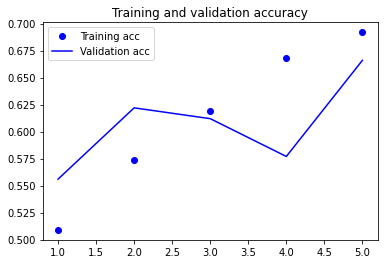

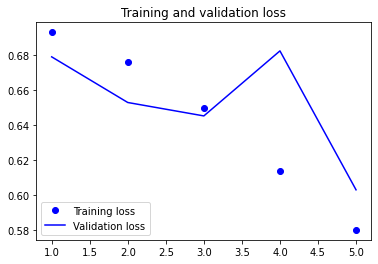

In [60]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Setting up a data augmentation configuration via ImageDataGenerator**

In [61]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

## **Displaying some randomly augmented training images**

# Defining a new convnet that includes dropout

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# **Training the convnet using data-augmentation generators**

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=1,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 126s 1s/step - loss: 0.6941 - acc: 0.5150 - val_loss: 0.6824 - val_acc: 0.6030


## ***Saving the model***

In [64]:
model.save('cats_and_dogs_small_2.h5')

# **Visualizing what convnets learn**

### Visualizing intermediate activations

In [65]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

**Preprocessing a single image**

In [68]:
img_path = '/content/drive/MyDrive/Git_Repository/Deep_Learning/Original_cat_dog/Cat-Dog-mini/cat.96.jpg'

In [69]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


**Displaying the test picture**

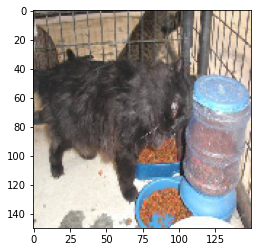

In [70]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

**Instantiating a model from an input tensor and a list of output tensors**

In [71]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [72]:
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)
print(activations)

[array([[[[2.0479217e-01, 3.4087706e-01, 1.2587727e-02, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [1.4357786e-01, 3.3198094e-01, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [1.6841532e-01, 3.6773822e-01, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [3.1983852e-01, 5.4985064e-01, 5.2629940e-02, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [2.4551320e-01, 3.8683748e-01, 3.0130487e-02, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [3.5475963e-01, 5.1480865e-01, 9.3510941e-02, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[4.0250417e-02, 2.8517380e-01, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 2.7157331e-01, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [4.0973496e-02, 2.5365421e-01, 4.3144380e-03, 

In [73]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


# Visualizing the fourth channel

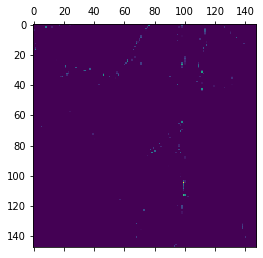

In [74]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

# **Visualizing every channel in every intermediate activation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


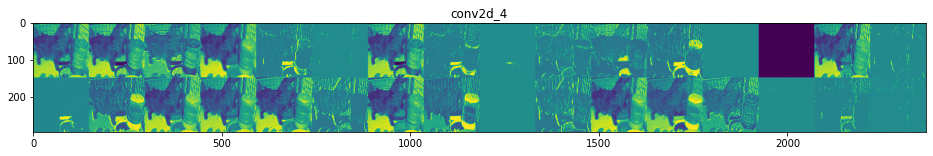

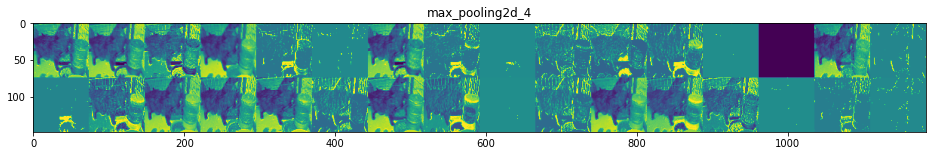

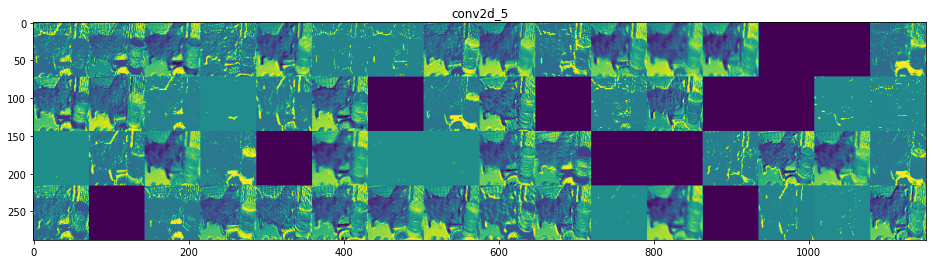

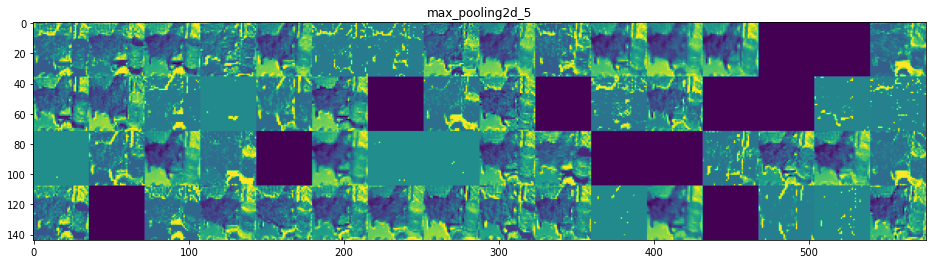

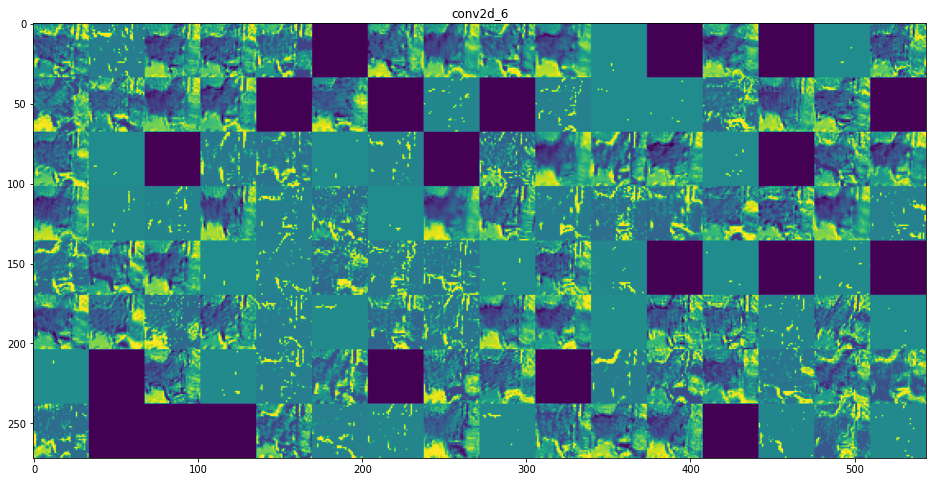

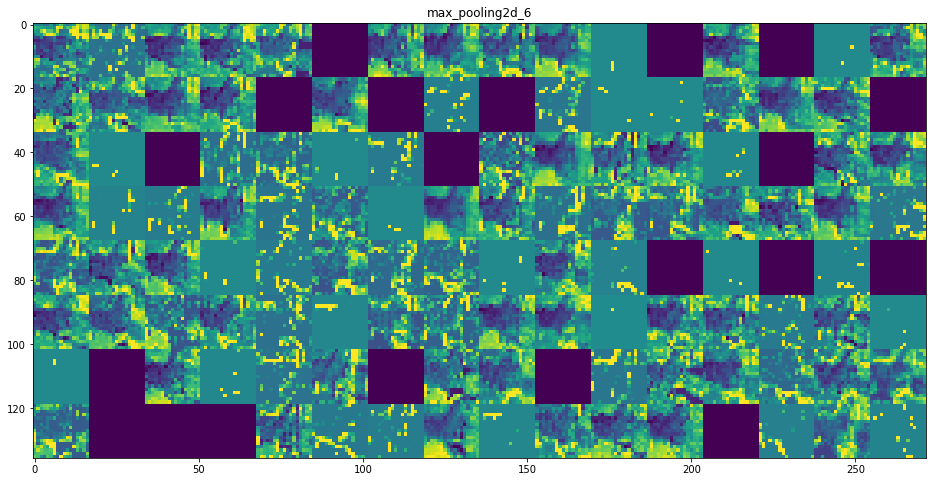

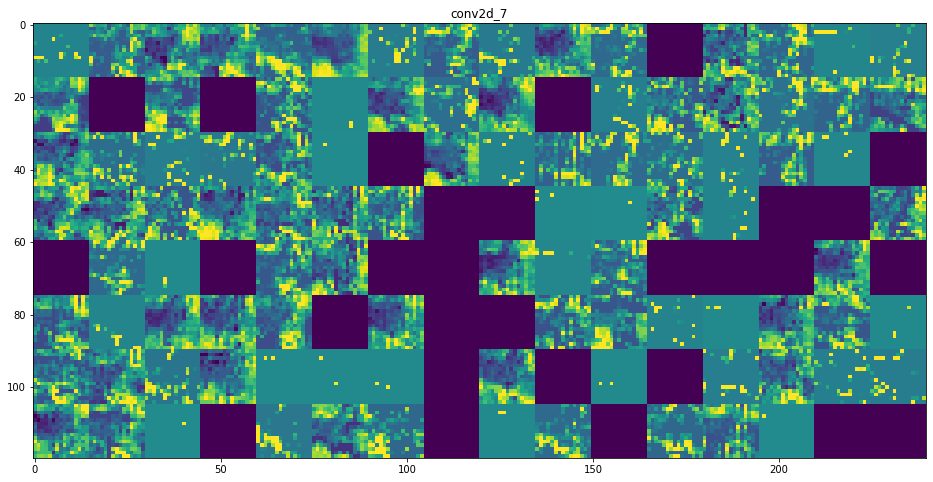

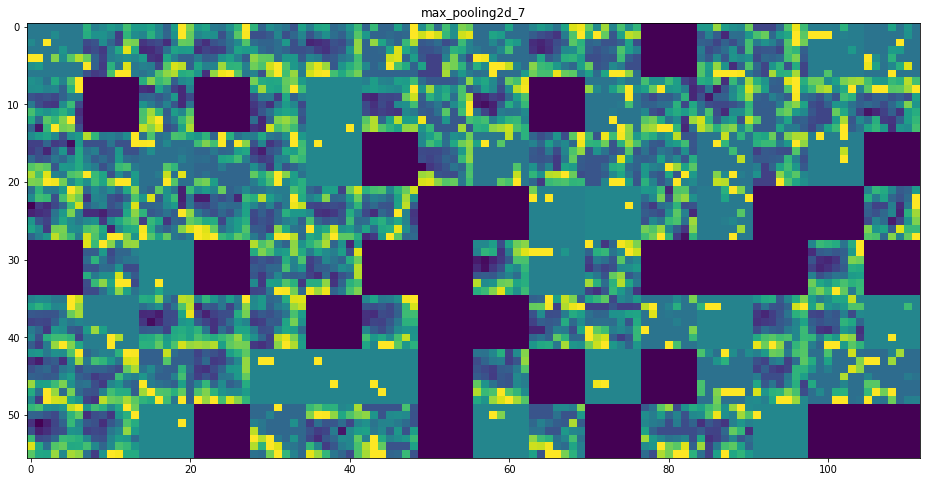

In [75]:
layer_names = []
# Names of the layers, so you can have them as part of your plot
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

# Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
  # Number of features in the feature map
  n_features = layer_activation.shape[-1]

  # The feature map has shape (1, size, size, n_features).
  size = layer_activation.shape[1]
  
  # Tiles the activation channels in this matrix
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  # Tiles each filter into a big horizontal grid
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :,
                                       col * images_per_row + row]
      
      # Post-processes the feature to make it visually palatable
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      
      # Displays the grid
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')